In [1]:
import tkinter as gui
from tkinter import filedialog
from tkinter import font
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model
%matplotlib inline
import matplotlib.pyplot as plt
model = load_model('my_model2.h5')
sign_dict = { 1:'Speed limit:20km/h',
            2:'Speed limit:30km/h',      
            3:'Speed limit:50km/h',       
            4:'Speed limit:60km/h',      
            5:'Speed limit:70km/h',    
            6:'Speed limit:80km/h',      
            7:'End of speed limit:80km/h',     
            8:'Speed limit:100km/h',    
            9:'Speed limit:120km/h',     
           10:'No Passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority Road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No Entry',       
           19:'General Caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double Curve',      
           23:'Bumpy Road',     
           24:'Slippery Road',       
           25:'Road narrows on the right',  
           26:'Road Work',    
           27:'Traffic Signals',      
           28:'Pedestrians',     
           29:'Children Crossing',     
           30:'Bicycles Crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead Only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep Right',     
           40:'Keep Left',      
           41:'Roundabout Mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

# ------------function to predict probabilities of images--------------------


def predict_probability(x):
    im = Image.open(x) 
    im=im.resize((20,20))
    im.save("temp.png", dpi=(15,15))
    img=Image.open("temp.png")


    img =img.resize((30,30))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    # img = np.expand_dims(img, axis=4)



    if len(img.shape) == 4:
        pred = model.predict_classes([img])[0]
        pred2=model.predict_proba([img])[0]
        pred2=np.array(pred2)
        top5=np.argsort(pred2)[-5:][::-1]
        result={}
        for i in top5:
            result[sign_dict[i+1]]=pred2[i]


        sign = sign_dict[pred+1]
        #plotting
        plt.figure(figsize=(17,5))
        plt.ylabel("prediction probability",color=[0.2,0,0])
        plt.xlabel('traffic signs',color=[0.2,0,0])
        plt.bar(result.keys(),result.values(),align='center',label='red',color=['red','blue','orange','green','yellow'])
        plt.savefig('graph.png')

        return sign
    else:
        return 'invalid image format.try some other image'

    


Using TensorFlow backend.


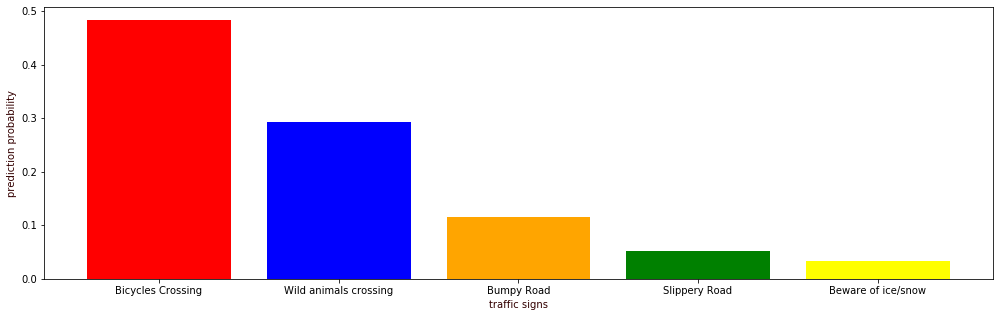

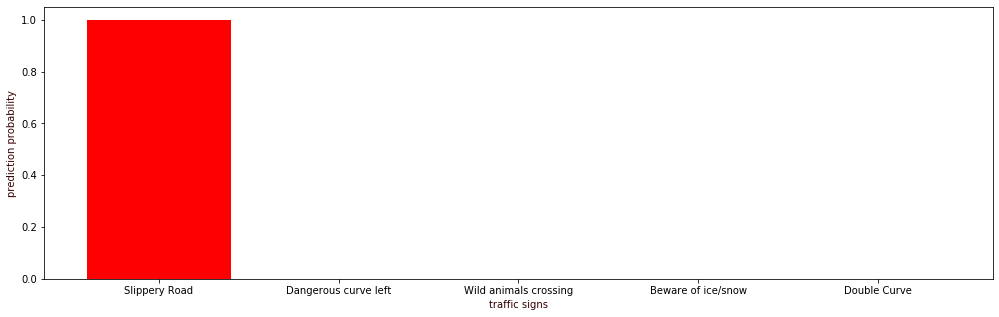

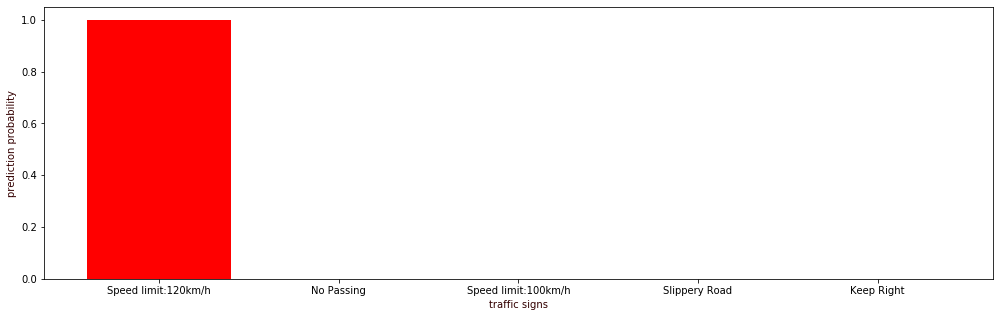

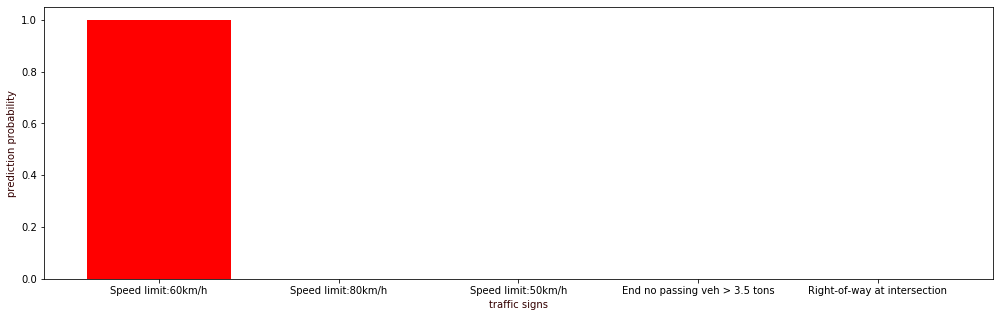

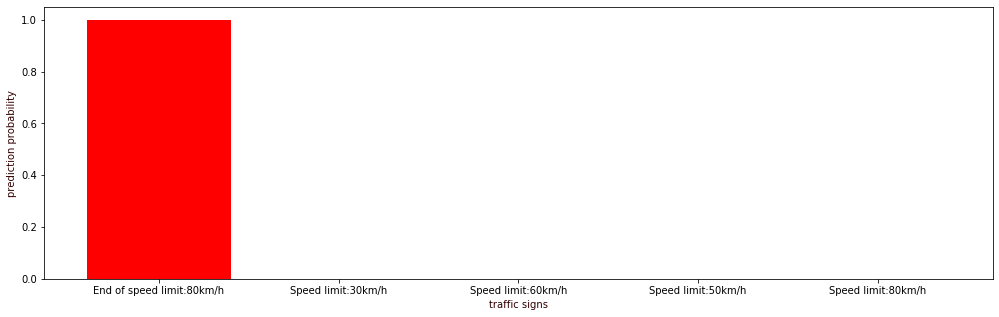

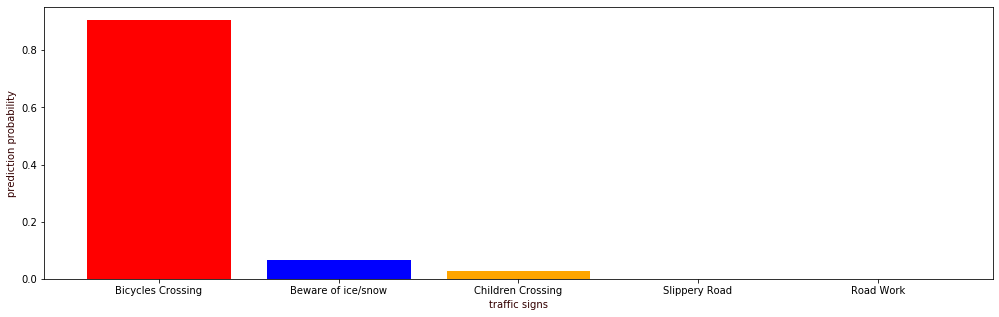

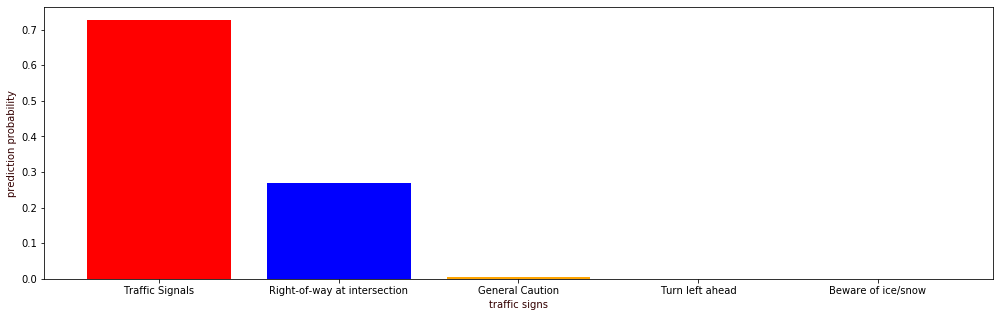

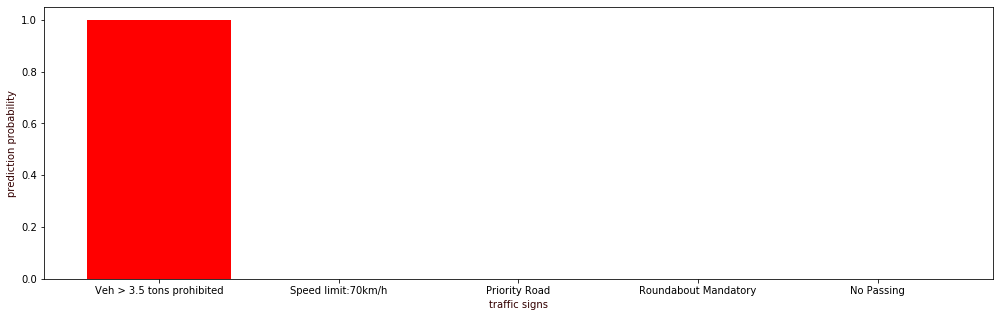

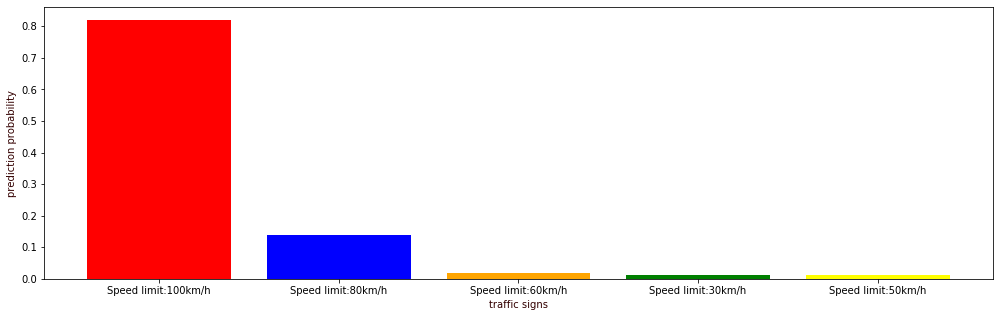

In [2]:


main=gui.Tk()
main.minsize(1300,650)
main.configure(background='#f7fff7')
f=font.Font(family='verdana',size=25,weight='bold')
f2=font.Font(family='verdana',size=15,weight='bold')
f3=font.Font(family='verdana',size=18,weight='bold')

gui.Label(text='Traffic Sign Predictor',font=f,fg='#14213d').place(relx=0.35,rely=0.05)


def open_and_predict_img():
    global path
    path = filedialog.askopenfilename(title='open')
    img = Image.open(path)
    img = img.resize((150, 150), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    img_panel = Label(main, image=img)
    img_panel.image = img
    img_panel.place(rely=0.2,relx=0.4)
  
def predict():
    x=predict_probability(path)
    
    gui.Label(text='Result:',font=f3,fg='#03071e').place(relx=0.70,rely=0.25)
    gui.Label(text='                                                         ',font=f2,bg='#f7fff7').place(relx=0.70,rely=0.30)
    gui.Label(text=x,font=f2,fg='#d62828').place(relx=0.70,rely=0.30)
    img=Image.open('graph.png')
    img = ImageTk.PhotoImage(img)
    img_panel = Label(main, image=img,height=350,width=1050)
    img_panel.image = img
    img_panel.place(rely=0.45,relx=0.1)
    
btn = Button(main, text='open image',
             command=open_and_predict_img,
             cursor='circle',
             fg='#CACBC1',
             bg='#1f1f1f',
             height=2,
             width=10,
             activebackground='#3d3d3d',
             highlightbackground='#3d3d3d'
            ).place(rely=0.20,relx=0.2)


btn2 = Button(main, text='Predict',
             command=predict,
             cursor='circle',
             fg='#CACBC1',
             bg='#1f1f1f',
             height=2,
             width=10,
             activebackground='#3d3d3d',
             highlightbackground='#3d3d3d'
            ).place(rely=0.35,relx=0.2)


main.mainloop()